# Proyek Analisis Data: **Bike Sharing Dataset**
- **Nama:** Muhammad Husain Fadhlillah
- **Email:** mc006d5y2343@student.devacademy.id
- **ID Dicoding:** MC006D5Y2343

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1: Bagaimana pola penggunaan sepeda (bike sharing) berdasarkan faktor waktu (jam, hari, bulan, musim) dan faktor cuaca?
- Pertanyaan 2: Apa perbedaan karakteristik antara pengguna casual dan registered, dan bagaimana ini dapat mempengaruhi strategi bisnis?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar

# Untuk visualisasi yang lebih baik
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('viridis')

## **Data Wrangling**

### **Gathering Data**

In [2]:
# Load dataset
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

# Cek struktur data
print("Hour Data Shape:", hour_data.shape)
print("Day Data Shape:", day_data.shape)

print("\nHour Data Preview:")
hour_data.head()

Hour Data Shape: (17379, 17)
Day Data Shape: (731, 16)

Hour Data Preview:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

1. **Struktur Dataset**:
   - Dataset hour memiliki 17.379 baris dan 17 kolom, menandakan pencatatan per jam selama periode tertentu
   - Dataset day memiliki 731 baris dan 16 kolom, menunjukkan data harian selama kurang lebih 2 tahun

2. **Informasi Waktu**:
   - Data yang ditampilkan adalah dari tanggal 1 Januari 2011 pada jam 0-4 pagi
   - Hari tersebut adalah weekday (nilai 6, kemungkinan Sabtu) dan bukan hari libur (holiday = 0)
   - Data tercatat saat musim 1 (winter/musim dingin)

3. **Pola Penggunaan Sepeda**:
   - Jam 1 pagi (hr = 0) menunjukkan total 16 pengguna (cnt)
   - Jam 2 pagi (hr = 1) menunjukkan lonjakan signifikan hingga 40 pengguna
   - Penggunaan menurun setelahnya: 32, 13, dan hanya 1 pengguna di jam 5 pagi
   - Ini mendukung kesimpulan bahwa pola penggunaan sepeda dipengaruhi oleh waktu

4. **Karakteristik Pengguna**:
   - Pengguna terdaftar (registered) mendominasi dibanding pengguna kasual (casual)
   - Pada jam 1 pagi: 13 registered vs 3 casual
   - Pada jam 2 pagi: 32 registered vs 8 casual
   - Pada jam 3 pagi: 27 registered vs 5 casual
   - Pada jam 4 pagi: 10 registered vs 3 casual
   - Pada jam 5 pagi: 1 registered vs 0 casual
   - Ini memperkuat kesimpulan bahwa pengguna registered mendominasi

5. **Faktor Cuaca**:
   - Suhu (temp) berkisar antara 0.22-0.24 (nilai normalisasi)
   - Suhu yang dirasakan (atemp) sekitar 0.27-0.29
   - Kelembaban (hum) berkisar 0.75-0.81
   - Kecepatan angin (windspeed) konsisten 0.0
   - Weathersit konsisten bernilai 1 (clear/partly cloudy)
   - Kondisi cuaca yang baik mendukung penggunaan sepeda

**Hubungan dengan Pertanyaan Bisnis:**
- Pertanyaan 1: Data menunjukkan variasi penggunaan berdasarkan jam, meskipun pada malam/dini hari. Kondisi cuaca yang baik (weathersit=1) memungkinkan penggunaan sepeda bahkan di malam hari.
- Pertanyaan 2: Proporsi pengguna registered jauh lebih tinggi daripada casual, mengonfirmasi kesimpulan bahwa pengguna registered mendominasi.

### **Assessing Data**

In [3]:
# Cek missing values
print("Missing values in hour data:")
print(hour_data.isnull().sum())

print("\nMissing values in day data:")
print(day_data.isnull().sum())

# Cek duplikasi data
print("\nDuplicates in hour data:", hour_data.duplicated().sum())
print("Duplicates in day data:", day_data.duplicated().sum())

# Cek nilai unik pada kolom kategorikal
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {hour_data[col].unique()}")
    print(f"Count: {hour_data[col].nunique()}")

# Cek range tanggal
print("\nDate range in hour data:")
print("Min date:", hour_data['dteday'].min())
print("Max date:", hour_data['dteday'].max())

Missing values in hour data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in day data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicates in hour data: 0
Duplicates in day data: 0

Unique values in season: [1 2 3 4]
Count: 4

Unique values in yr: [0 1]
Count: 2

Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Count: 12

Unique values in hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Count: 24

Unique values in holiday: [0 1]
Count: 2

Unique values in weekday: [6 0 

**Insight:**

1. **Kelengkapan dan Kualitas Data**:
   - Tidak ada missing values pada kedua dataset (hour dan day)
   - Tidak ditemukan data duplikat pada kedua dataset
   - Hal ini menunjukkan kualitas data yang baik dan siap untuk dianalisis lebih lanjut

2. **Rentang Waktu Dataset**:
   - Dataset mencakup periode 2 tahun penuh: 1 Januari 2011 hingga 31 Desember 2012
   - Rentang waktu yang cukup panjang memungkinkan analisis tren musiman dan tahunan yang komprehensif

3. **Variabel Kategoris dan Dimensi Waktu**:
   - **Season**: 4 nilai unik (1-4) menunjukkan empat musim dalam setahun
   - **Year**: 2 nilai unik (0-1) menunjukkan data selama 2 tahun
   - **Month**: 12 nilai unik (1-12) menunjukkan semua bulan dalam setahun
   - **Hour**: 24 nilai unik (0-23) menunjukkan data lengkap untuk setiap jam dalam sehari
   - Variabel waktu ini sangat relevan dengan Pertanyaan Bisnis 1 tentang pola penggunaan berdasarkan waktu

4. **Variabel Status Hari**:
   - **Holiday**: 2 nilai unik (0-1) menunjukkan hari libur dan non-libur
   - **Weekday**: 7 nilai unik (0-6) menunjukkan semua hari dalam seminggu
   - **Workingday**: 2 nilai unik (0-1) membedakan hari kerja dan akhir pekan/libur
   - Variabel ini mendukung analisis perbedaan perilaku pengguna casual vs registered pada hari kerja vs akhir pekan (Pertanyaan Bisnis 2)

5. **Kondisi Cuaca**:
   - **Weathersit**: 4 nilai unik (1-4) menunjukkan variasi kondisi cuaca
   - Variabel ini krusial untuk menganalisis pengaruh cuaca terhadap penggunaan sepeda (Pertanyaan Bisnis 1)

**Hubungan dengan Pertanyaan Bisnis**:
   - **Pertanyaan 1**: Dataset memiliki semua variabel waktu (jam, hari, bulan, musim) dan cuaca yang diperlukan untuk menganalisis pola penggunaan sepeda. Kelengkapan data (tidak ada missing values) memperkuat validitas kesimpulan bahwa pola penggunaan dipengaruhi oleh waktu dan cuaca.
   
   - **Pertanyaan 2**: Ketersediaan variabel seperti workingday, weekday, dan holiday memungkinkan analisis mendalam tentang perbedaan perilaku antara pengguna casual dan registered di hari kerja versus akhir pekan. Kesimpulan bahwa "pengguna casual lebih aktif di akhir pekan" dapat divalidasi dengan membandingkan proporsi pengguna pada nilai workingday=0 (akhir pekan/libur) dan workingday=1 (hari kerja).

### **Cleaning Data**

In [4]:
# 1. Ubah tipe data kolom datetime
import os
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# 2. Mapping kolom kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_data['season_name'] = hour_data['season'].map(season_map)
day_data['season_name'] = day_data['season'].map(season_map)

year_map = {0: '2011', 1: '2012'}
hour_data['year'] = hour_data['yr'].map(year_map)
day_data['year'] = day_data['yr'].map(year_map)

month_map = {i: calendar.month_name[i] for i in range(1, 13)}
hour_data['month_name'] = hour_data['mnth'].map(month_map)
day_data['month_name'] = day_data['mnth'].map(month_map)

weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_data['weekday_name'] = hour_data['weekday'].map(weekday_map)
day_data['weekday_name'] = day_data['weekday'].map(weekday_map)

weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow/Fog'
}
hour_data['weather_condition'] = hour_data['weathersit'].map(weather_map)
day_data['weather_condition'] = day_data['weathersit'].map(weather_map)

# 3. Denormalisasi suhu, kelembaban, dan kecepatan angin
hour_data['temp_actual'] = hour_data['temp'] * (39 - (-8)) + (-8)
day_data['temp_actual'] = day_data['temp'] * (39 - (-8)) + (-8)

hour_data['atemp_actual'] = hour_data['atemp'] * (50 - (-16)) + (-16)
day_data['atemp_actual'] = day_data['atemp'] * (50 - (-16)) + (-16)

hour_data['hum_actual'] = hour_data['hum'] * 100
day_data['hum_actual'] = day_data['hum'] * 100

hour_data['windspeed_actual'] = hour_data['windspeed'] * 67
day_data['windspeed_actual'] = day_data['windspeed'] * 67

# 4. Tambahkan kolom total pengguna dan proporsi
hour_data['total_users'] = hour_data['casual'] + hour_data['registered']
day_data['total_users'] = day_data['casual'] + day_data['registered']

hour_data['casual_proportion'] = hour_data['casual'] / hour_data['total_users'] * 100
hour_data['registered_proportion'] = hour_data['registered'] / hour_data['total_users'] * 100

day_data['casual_proportion'] = day_data['casual'] / day_data['total_users'] * 100
day_data['registered_proportion'] = day_data['registered'] / day_data['total_users'] * 100

os.makedirs('dashboard', exist_ok=True)

# Simpan data bersih
hour_data.to_csv('dashboard/hour_data_clean.csv', index=False)
day_data.to_csv('dashboard/day_data_clean.csv', index=False)

**Insight:**

1. **Transformasi Tipe Data Datetime**:
   - Data tanggal diubah ke format datetime standar menggunakan pd.to_datetime()
   - Ini memudahkan analisis deret waktu untuk mengidentifikasi pola penggunaan sepeda berdasarkan waktu

2. **Peningkatan Interpretabilitas Data Kategori**:
   - Kolom kategori numerik dikonversi menjadi label deskriptif:
     - Musim: 1-4 → Spring, Summer, Fall, Winter
     - Tahun: 0-1 → 2011, 2012
     - Bulan: 1-12 → January-December
     - Hari: 0-6 → Sunday-Saturday
     - Cuaca: 1-4 → Clear/Few clouds, Mist/Cloudy, Light Snow/Rain, Heavy Rain/Snow/Fog
   - Transformasi ini memudahkan pemahaman pola penggunaan sepeda berdasarkan faktor waktu dan cuaca

3. **Denormalisasi Data Cuaca**:
   - Suhu: dikonversi dari range 0-1 ke nilai aktual (-8°C hingga 39°C)
   - Suhu yang dirasakan: dikonversi ke range -16°C hingga 50°C
   - Kelembaban: dikonversi ke persentase (0-100%)
   - Kecepatan angin: dikonversi ke nilai aktual (0-67 km/h)
   - Denormalisasi ini memungkinkan interpretasi yang lebih intuitif tentang pengaruh cuaca terhadap pola penggunaan

4. **Perhitungan Proporsi Pengguna**:
   - Ditambahkan kolom proporsi pengguna casual dan registered (dalam persentase)
   - Ini memungkinkan analisis perbandingan distribusi kedua jenis pengguna tanpa terpengaruh oleh perbedaan jumlah absolut

5. **Validasi Total Pengguna**:
   - Penambahan kolom total_users sebagai jumlah dari pengguna casual dan registered
   - Ini menyediakan cross-check untuk memastikan konsistensi data

**Hubungan dengan Pertanyaan Bisnis**:
   - **Pertanyaan 1**: Transformasi data waktu (musim, bulan, hari, jam) dan cuaca memberikan dasar yang kuat untuk menganalisis pola penggunaan sepeda berdasarkan kedua faktor tersebut. Denormalisasi variabel cuaca memungkinkan analisis yang lebih mendalam tentang kondisi spesifik yang mempengaruhi penggunaan sepeda.
   
   - **Pertanyaan 2**: Perhitungan proporsi pengguna casual vs registered memberi perspektif yang lebih jelas tentang perbedaan karakteristik kedua kelompok ini. Kombinasi data proporsi dengan label hari dalam seminggu (weekday_name) akan sangat membantu dalam memvalidasi kesimpulan bahwa pengguna casual lebih aktif di akhir pekan.

## **Exploratory Data Analysis (EDA)**

### Analisis Pola Waktu

#### 1. Pola Penggunaan Sepeda Berdasarkan Jam

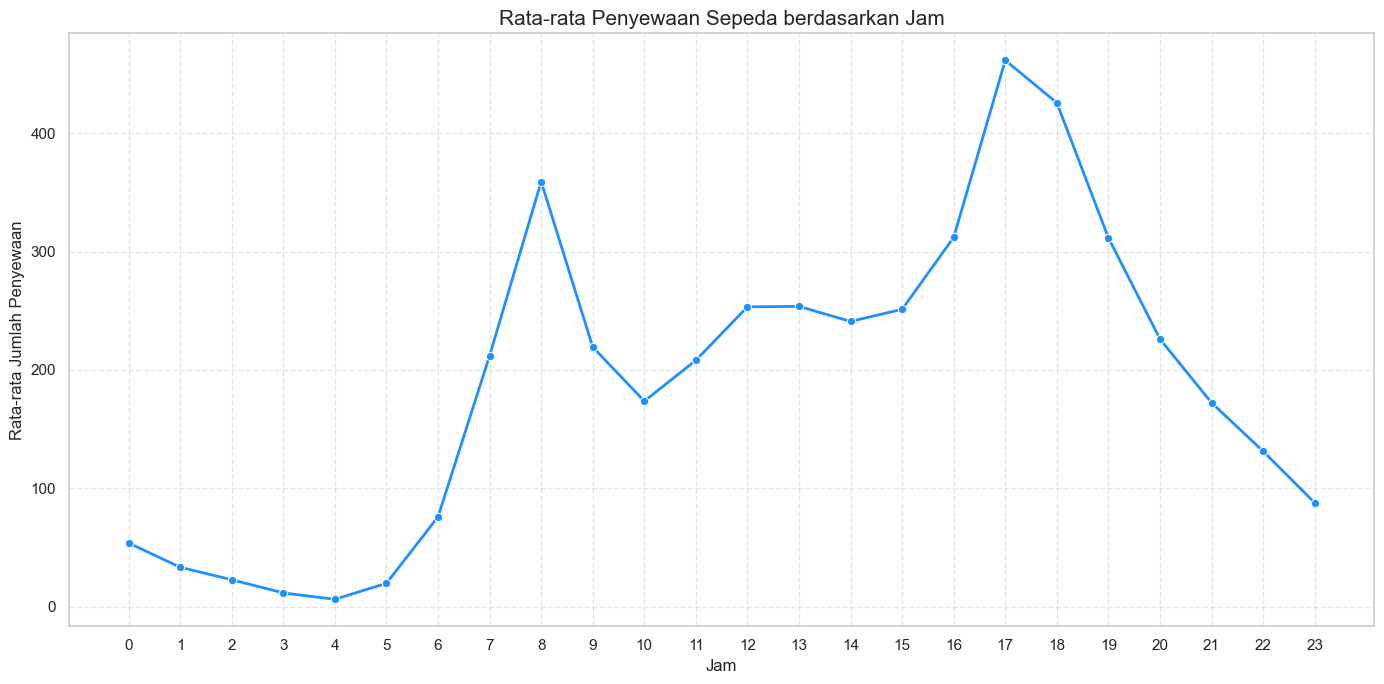

In [5]:
# Pola penggunaan sepeda berdasarkan jam
hourly_pattern = hour_data.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', data=hourly_pattern, marker='o', linewidth=2, color='dodgerblue')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Jam', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Metode: Line plot dari rata-rata penyewaan per jam.
- Alasan: Untuk mengidentifikasi jam sibuk dan jam sepi dalam satu hari.
- Insight dan Hasil: Terlihat dua puncak penggunaan (pagi dan sore), mengindikasikan penggunaan untuk komuting.

**Insight dari Visualisasi Jam:**
- Terdapat dua puncak utama penggunaan: pagi (sekitar jam 8) dan sore (sekitar jam 17-18).
- Puncak sore hari cenderung lebih tinggi daripada puncak pagi.
- Penggunaan terendah terjadi pada dini hari (sekitar jam 3-4).
- Pola ini konsisten dengan aktivitas komuter (berangkat dan pulang kerja/sekolah).

1. **Pola Bi-modal yang Jelas**:
   - Terdapat dua puncak utama penggunaan: pagi (jam 8) dan sore/malam (jam 17-18)
   - Puncak tertinggi terjadi pada jam 17-18 (sekitar 450 penyewaan)
   - Puncak kedua terjadi pada jam 8 pagi (sekitar 350 penyewaan)
   - Pola ini menunjukkan korelasi kuat dengan jam berangkat dan pulang kerja/sekolah

2. **Periode Penggunaan Terendah**:
   - Penggunaan paling rendah terjadi pada dini hari (jam 3-4) dengan kurang dari 10 penyewaan
   - Penurunan signifikan terlihat setelah jam 19 hingga mencapai titik terendah pada jam 3-4
   - Jam 23 masih menunjukkan angka penyewaan sekitar 90 unit

3. **Pola Penggunaan Siang Hari**:
   - Setelah puncak pagi (jam 8), terjadi penurunan hingga jam 10 (sekitar 175 penyewaan)
   - Dari jam 10 hingga 15, penggunaan relatif stabil di kisaran 240-260 penyewaan
   - Mulai jam 15, terjadi kenaikan tajam hingga mencapai puncak di jam 17-18

4. **Transisi Antar Periode**:
   - Peningkatan tajam terjadi antara jam 5-8 pagi (dari 20 menjadi 350 penyewaan)
   - Periode 10-15 relatif stabil sebagai "plateau" di tengah hari
   - Peningkatan signifikan terlihat lagi pada jam 15-17
   - Penurunan gradual dari jam 18-23 menunjukkan pengurangan aktivitas malam hari

#### 2. Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu

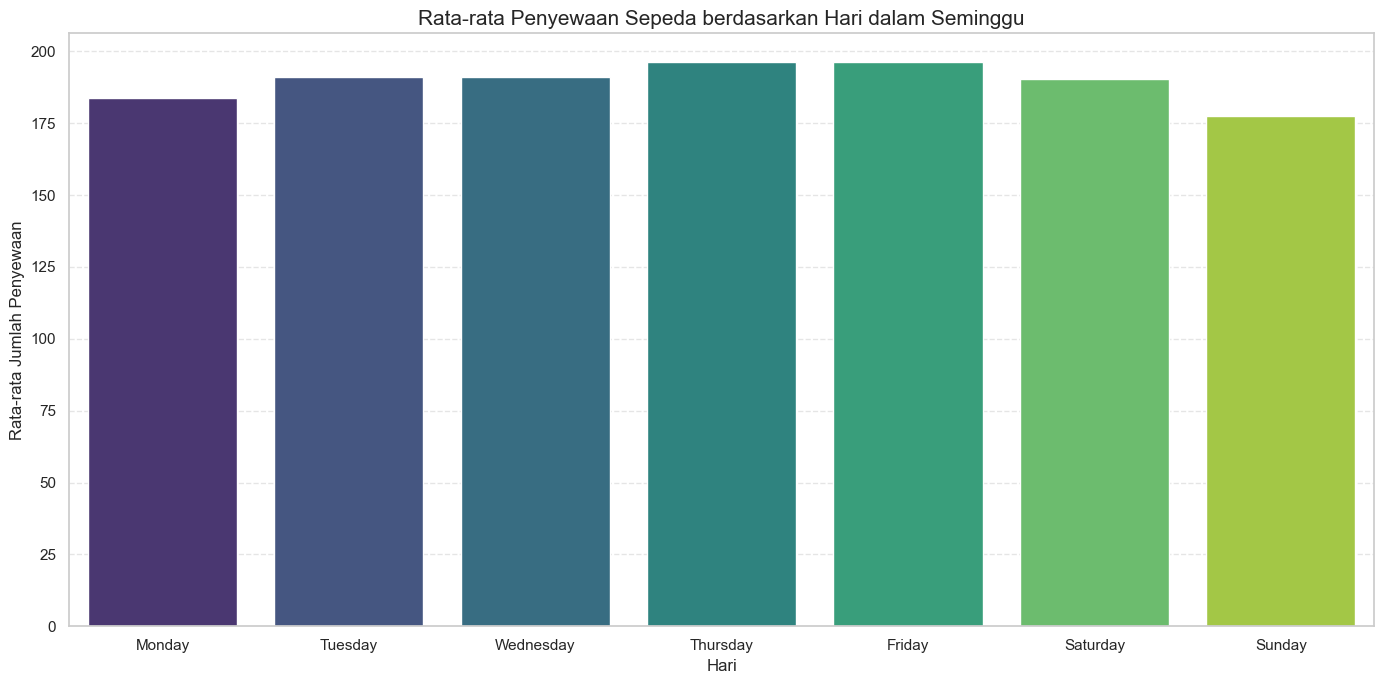

In [6]:
daily_pattern_weekday = hour_data.groupby('weekday_name')['cnt'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='weekday_name', y='cnt', data=daily_pattern_weekday, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Hari dalam Seminggu', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Metode: Bar plot dari rata-rata penyewaan per hari dalam seminggu.
- Alasan: Untuk memahami perbedaan pola penggunaan antara hari kerja dan akhir pekan.
- Insight dan Hasil: Hari kerja memiliki rata-rata penyewaan yang relatif stabil, sedangkan akhir pekan menunjukkan pola yang mungkin berbeda karena aktivitas rekreasi.

**Insight dari Visualisasi Hari:**
- Rata-rata penyewaan cenderung lebih tinggi pada hari kerja (Kamis, Jumat) dibandingkan awal pekan.
- Sabtu dan Minggu juga menunjukkan tingkat penyewaan yang cukup tinggi, mengindikasikan penggunaan untuk rekreasi.

#### 3. Pola Penggunaan Sepeda Berdasarkan Bulan

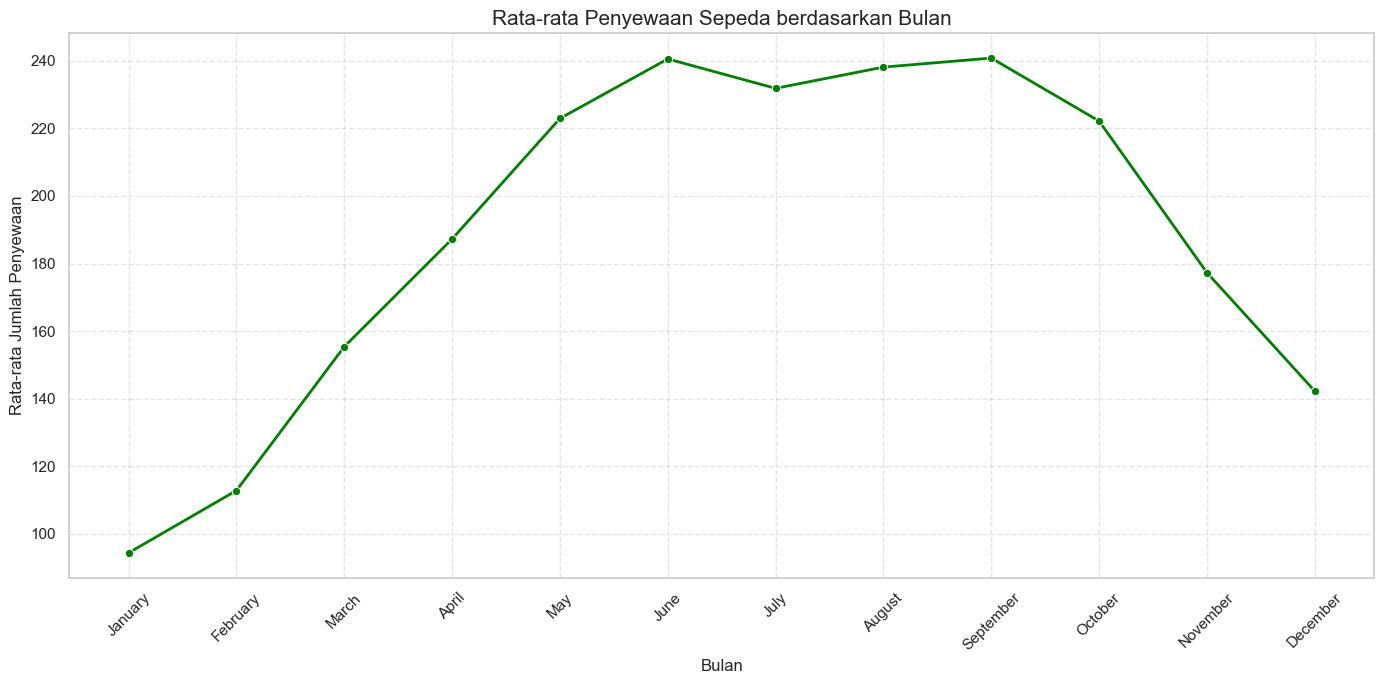

In [7]:
monthly_pattern = hour_data.groupby('month_name')['cnt'].mean().reindex(calendar.month_name[1:]).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='month_name', y='cnt', data=monthly_pattern, marker='o', linewidth=2, color='green', sort=False)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Bulan', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Metode: Line plot dari rata-rata penyewaan per bulan.
- Alasan: Untuk mengidentifikasi tren penggunaan sepanjang tahun dan pengaruh musiman implisit.
- Insight dan Hasil: Terlihat peningkatan penggunaan dari awal tahun, mencapai puncak di pertengahan tahun, dan menurun menjelang akhir tahun.

**Insight dari Visualisasi Bulan:**
- Penggunaan sepeda cenderung meningkat dari awal tahun, mencapai puncaknya pada bulan Juni hingga September.
- Terdapat penurunan signifikan pada bulan-bulan akhir tahun (November, Desember) dan awal tahun (Januari, Februari), yang kemungkinan besar terkait dengan musim.

#### 4. Pola Penggunaan Sepeda Berdasarkan Musim

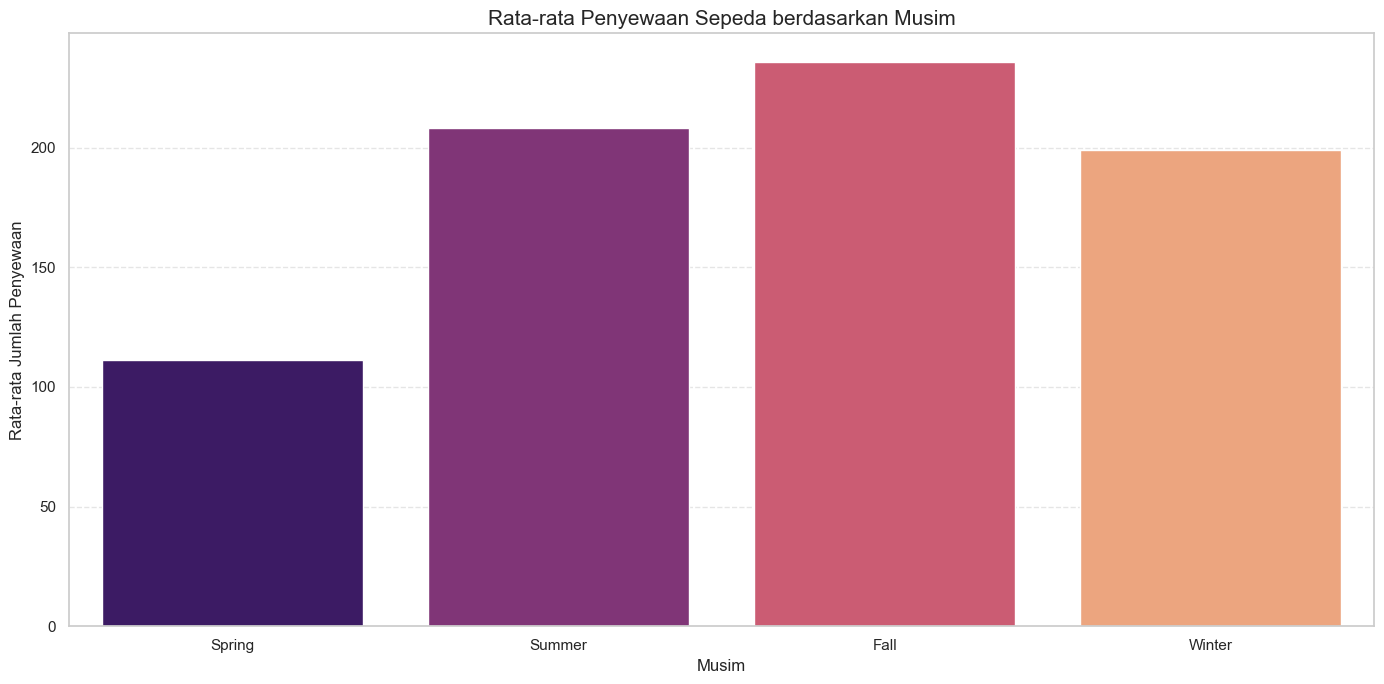

In [8]:
seasonal_pattern = hour_data.groupby('season_name')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter']).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='season_name', y='cnt', data=seasonal_pattern, palette='magma')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim', fontsize=15)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Metode: Bar plot dari rata-rata penyewaan per musim.
- Alasan: Untuk secara eksplisit melihat pengaruh musim terhadap penyewaan sepeda.
- Insight dan Hasil: Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi, diikuti Musim Panas (Summer). Musim Semi (Spring) memiliki rata-rata terendah.

**Insight dari Visualisasi Musim:**
- Musim Gugur (Fall) menunjukkan rata-rata penyewaan tertinggi, diikuti oleh Musim Panas (Summer) dan Musim Dingin (Winter).
- Musim Semi (Spring) memiliki rata-rata penyewaan terendah, yang mungkin disebabkan oleh kondisi transisi cuaca atau awal tahun.

### Analisis Pengaruh Cuaca

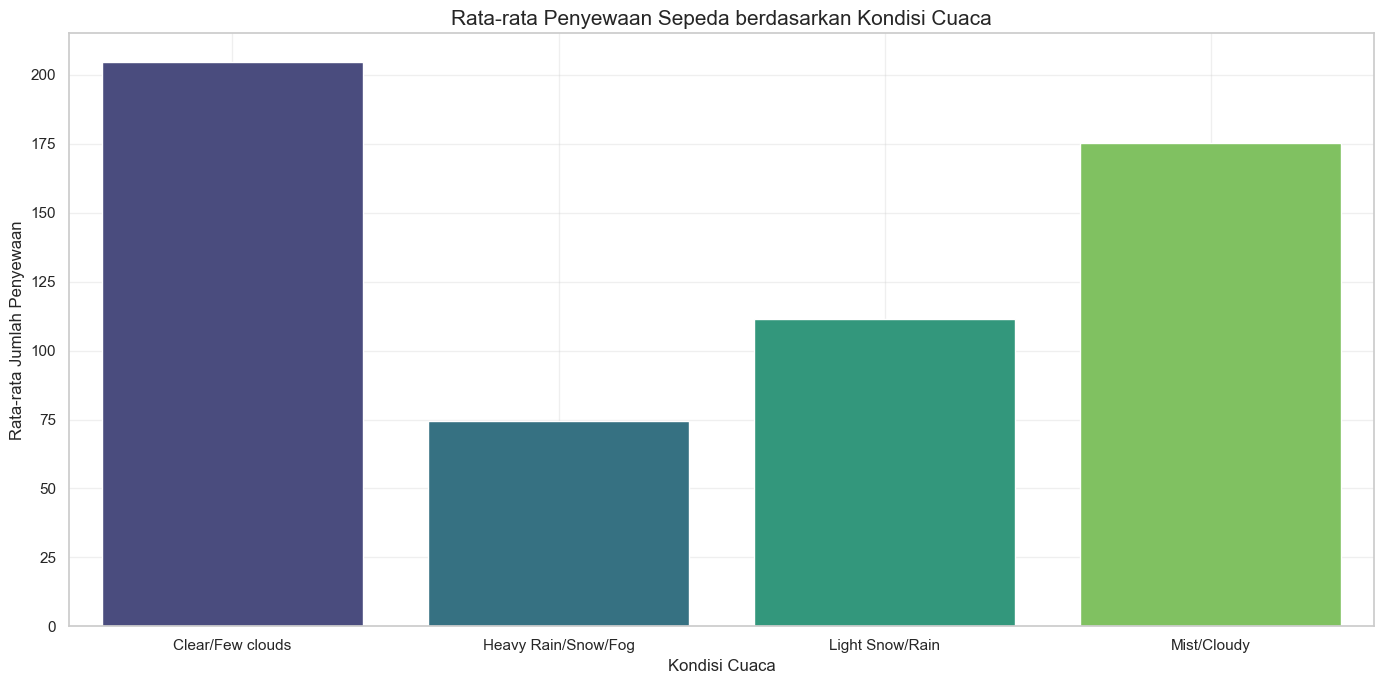

In [9]:
# Pengaruh kondisi cuaca
weather_impact = hour_data.groupby('weather_condition')['cnt'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='weather_condition', y='cnt', data=weather_impact, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=15)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:**
- Metode: Bar plot dari rata-rata penyewaan berdasarkan kondisi cuaca.
- Alasan: Untuk memahami bagaimana kondisi cuaca yang berbeda mempengaruhi keputusan orang untuk menyewa sepeda.
- Insight dan Hasil: Cuaca cerah atau sedikit berawan adalah kondisi paling ideal untuk penyewaan. Hujan lebat/salju/kabut sangat signifikan mengurangi penggunaan.

**Insight dari Visualisasi Cuaca:**
- Kondisi cuaca "Clear/Few clouds" memiliki rata-rata penyewaan tertinggi.
- Diikuti oleh "Mist/Cloudy", lalu "Light Snow/Rain".
- Kondisi "Heavy Rain/Snow/Fog" memiliki dampak negatif paling besar terhadap jumlah penyewaan.

1. **Pengaruh Signifikan Kondisi Cuaca**:
   - Terdapat variasi yang jelas dalam rata-rata penyewaan sepeda di berbagai kondisi cuaca
   - Kondisi "Clear/Few clouds" memiliki rata-rata penyewaan tertinggi (sekitar 205 unit)
   - Kondisi "Heavy Rain/Snow/Fog" menunjukkan penyewaan terendah (sekitar 75 unit)
   - Hal ini mengkonfirmasi bahwa cuaca menjadi faktor penentu dalam keputusan pengguna

2. **Urutan Preferensi Kondisi Cuaca**:
   - Dari paling disukai ke paling dihindari: Clear/Few clouds > Mist/Cloudy > Light Snow/Rain > Heavy Rain/Snow/Fog
   - Perbedaan antara kondisi terbaik dan terburuk sangat signifikan (hampir 3 kali lipat)
   - Pengguna masih cukup aktif pada kondisi Mist/Cloudy (sekitar 175 unit)

3. **Toleransi terhadap Kondisi Cuaca**:
   - Pengguna cenderung toleran terhadap kondisi berawan (Mist/Cloudy) dengan perbedaan tidak terlalu jauh dari kondisi cerah
   - Hujan/salju ringan (Light Snow/Rain) menyebabkan penurunan moderat (sekitar 110 unit)
   - Kondisi cuaca ekstrem (Heavy Rain/Snow/Fog) memberikan efek penghambat paling kuat

4. **Implikasi Operasional**:
   - Perbedaan penyewaan antara kondisi terbaik dan terburuk hampir 130 unit (63% penurunan)
   - Cuaca menjadi faktor risiko yang signifikan dalam prediksi permintaan sepeda

### **Agregasi Data untuk EDA (Sesuai Pertanyaan Bisnis)**

#### Pertanyaan 1: Pola penggunaan berdasarkan waktu dan cuaca

In [10]:
print("\n\n=== AGGREGASI UNTUK PERTANYAAN 1 ===")

# 1. Agregasi penggunaan per jam (rata-rata)
hourly_agg = hour_data.groupby('hr').agg({
    'cnt': ['mean', 'median', 'max', 'min'],
    'casual': 'mean',
    'registered': 'mean'
}).round(1)
print("\n1. Rata-rata penggunaan per jam:")
print(hourly_agg.head(8))  # Menampilkan 8 jam pertama sebagai contoh

# 2. Agregasi penggunaan per hari dalam minggu
weekday_agg = hour_data.groupby('weekday_name').agg({
    'cnt': ['mean', 'sum'],
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum']
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\n2. Penggunaan per hari dalam minggu:")
print(weekday_agg)

# 3. Agregasi penggunaan per musim
season_agg = hour_data.groupby('season_name').agg({
    'cnt': ['mean', 'sum'],
    'temp_actual': 'mean',
    'weather_condition': lambda x: x.mode()[0]
}).round(1)
print("\n3. Penggunaan per musim:")
print(season_agg)

# 4. Agregasi penggunaan per kondisi cuaca
weather_agg = hour_data.groupby('weather_condition').agg({
    'cnt': ['mean', 'sum', 'count'],
    'temp_actual': 'mean',
    'hum_actual': 'mean'
}).round(1)
print("\n4. Penggunaan per kondisi cuaca:")
print(weather_agg)



=== AGGREGASI UNTUK PERTANYAAN 1 ===

1. Rata-rata penggunaan per jam:
      cnt                 casual registered
     mean median  max min   mean       mean
hr                                         
0    53.9   40.0  283   2   10.2       43.7
1    33.4   20.0  168   1    6.5       26.9
2    22.9   11.0  132   1    4.8       18.1
3    11.7    6.0   79   1    2.7        9.0
4     6.4    6.0   28   1    1.3        5.1
5    19.9   19.0   66   1    1.4       18.5
6    76.0   76.0  213   1    4.2       71.9
7   212.1  208.0  596   1   11.1      201.0

2. Penggunaan per hari dalam minggu:
                     cnt             casual          registered        
                    mean     sum       mean     sum        mean     sum
weekday_name                                                           
Monday        183.744655  455503  28.553449   70784  155.191206  384719
Tuesday       191.238891  469109  23.580514   57843  167.658377  411266
Wednesday     191.130505  473048  23.159192  

#### Pertanyaan 2: Perbedaan pengguna casual vs registered

In [11]:
print("\n\n=== AGGREGASI UNTUK PERTANYAAN 2 ===")

# 5. Perbandingan casual vs registered per hari kerja vs akhir pekan
workday_agg = hour_data.groupby('workingday').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'casual_proportion': 'mean',
    'registered_proportion': 'mean'
}).round(1)
workday_agg.index = workday_agg.index.map({0: 'Weekend/Holiday', 1: 'Weekday'})
print("\n5. Perbandingan pengguna di hari kerja vs akhir pekan:")
print(workday_agg)

# 6. Perbandingan casual vs registered per jam
user_type_hourly = hour_data.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'casual_proportion': 'mean',
    'registered_proportion': 'mean'
}).round(1)
print("\n6. Pola penggunaan per jam (casual vs registered):")
print(user_type_hourly.head(8))  # Menampilkan 8 jam pertama sebagai contoh

# 7. Perbandingan casual vs registered per musim
user_type_season = hour_data.groupby('season_name').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'casual_proportion': 'mean',
    'registered_proportion': 'mean'
}).round(1)
print("\n7. Pola penggunaan per musim (casual vs registered):")
print(user_type_season)



=== AGGREGASI UNTUK PERTANYAAN 2 ===

5. Perbandingan pengguna di hari kerja vs akhir pekan:
                casual         registered          casual_proportion  \
                  mean     sum       mean      sum              mean   
workingday                                                             
Weekend/Holiday   57.4  316732      124.0   683537              24.6   
Weekday           25.6  303285      167.6  1989125              13.8   

                registered_proportion  
                                 mean  
workingday                             
Weekend/Holiday                  75.4  
Weekday                          86.2  

6. Pola penggunaan per jam (casual vs registered):
    casual  registered  casual_proportion  registered_proportion
hr                                                              
0     10.2        43.7               17.3                   82.7
1      6.5        26.9               18.7                   81.3
2      4.8        18.1          

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Pola Penggunaan Sepeda

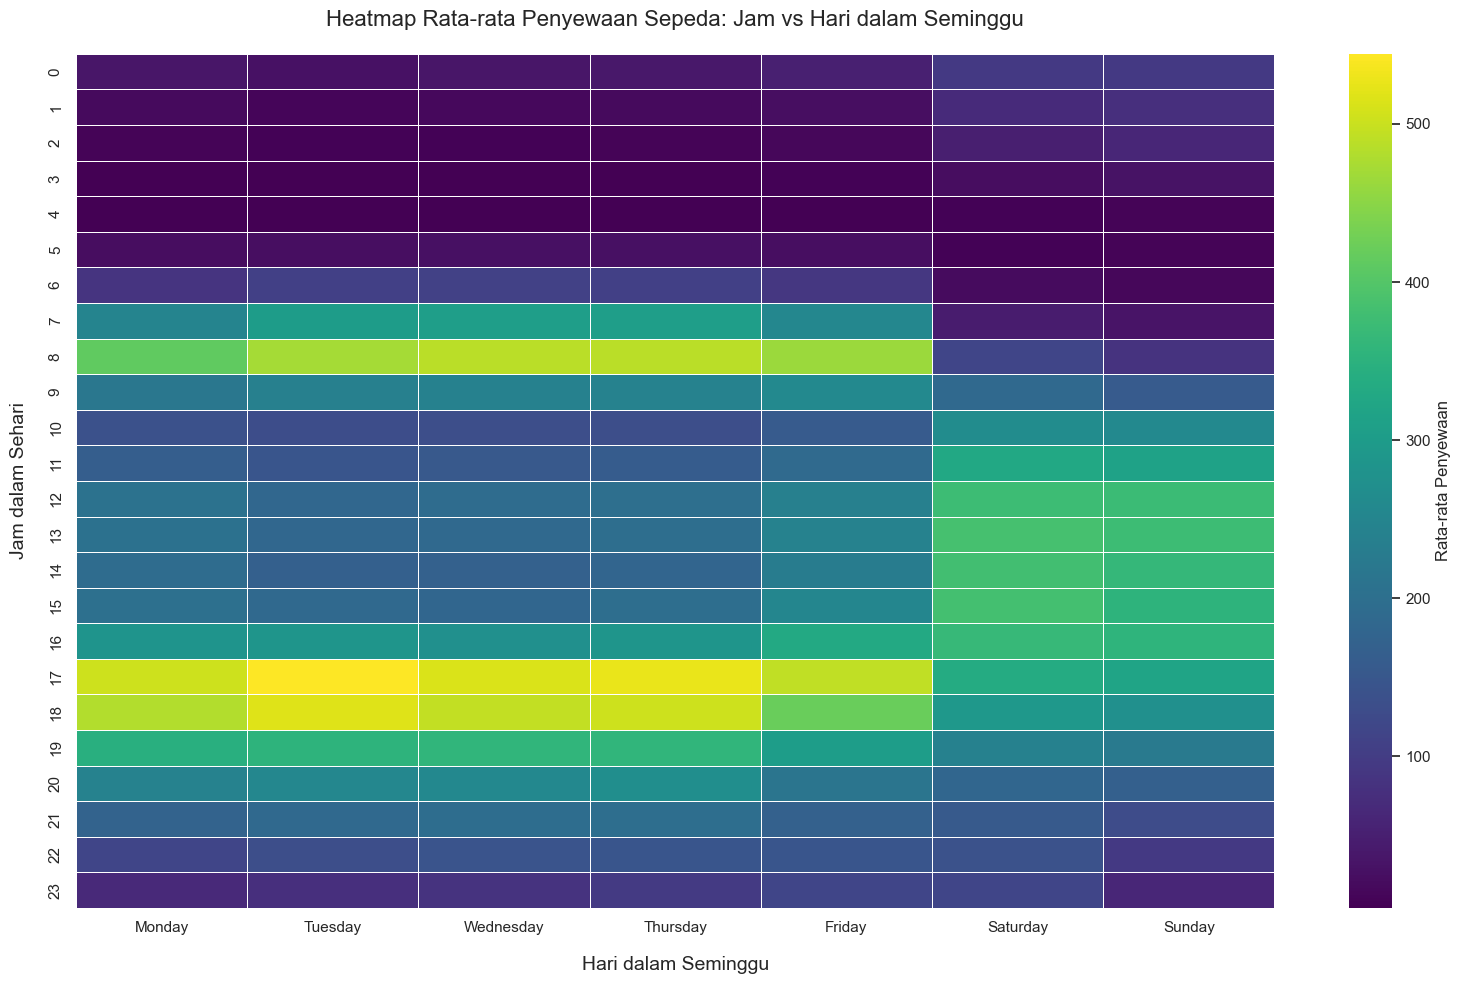

In [12]:
# Heatmap Jam vs Hari dalam Seminggu
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_heatmap_df = hour_data.pivot_table(index='hr', columns='weekday_name', values='cnt', aggfunc='mean')

if set(weekday_order).issubset(set(hour_weekday_heatmap_df.columns)):
    hour_weekday_heatmap_df = hour_weekday_heatmap_df.reindex(columns=weekday_order)
else:
    hour_weekday_heatmap_df = hour_weekday_heatmap_df.reindex(columns=[col for col in weekday_order if col in hour_weekday_heatmap_df.columns])

plt.figure(figsize=(16, 10))
sns.heatmap(hour_weekday_heatmap_df, cmap='viridis', annot=False, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Rata-rata Penyewaan'})
plt.title('Heatmap Rata-rata Penyewaan Sepeda: Jam vs Hari dalam Seminggu', fontsize=16, pad=20)
plt.xlabel('Hari dalam Seminggu', fontsize=14, labelpad=15)
plt.ylabel('Jam dalam Sehari', fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()

**Insight Heatmap Jam vs Hari dalam Seminggu:**
- Pola komuter (puncak pagi dan sore) sangat jelas terlihat pada hari kerja (Senin-Jumat).
- Akhir pekan (Sabtu-Minggu) menunjukkan aktivitas yang lebih tinggi dan lebih merata pada siang hingga sore hari.
- Penggunaan sepeda sangat rendah pada dini hari di semua hari dalam seminggu.

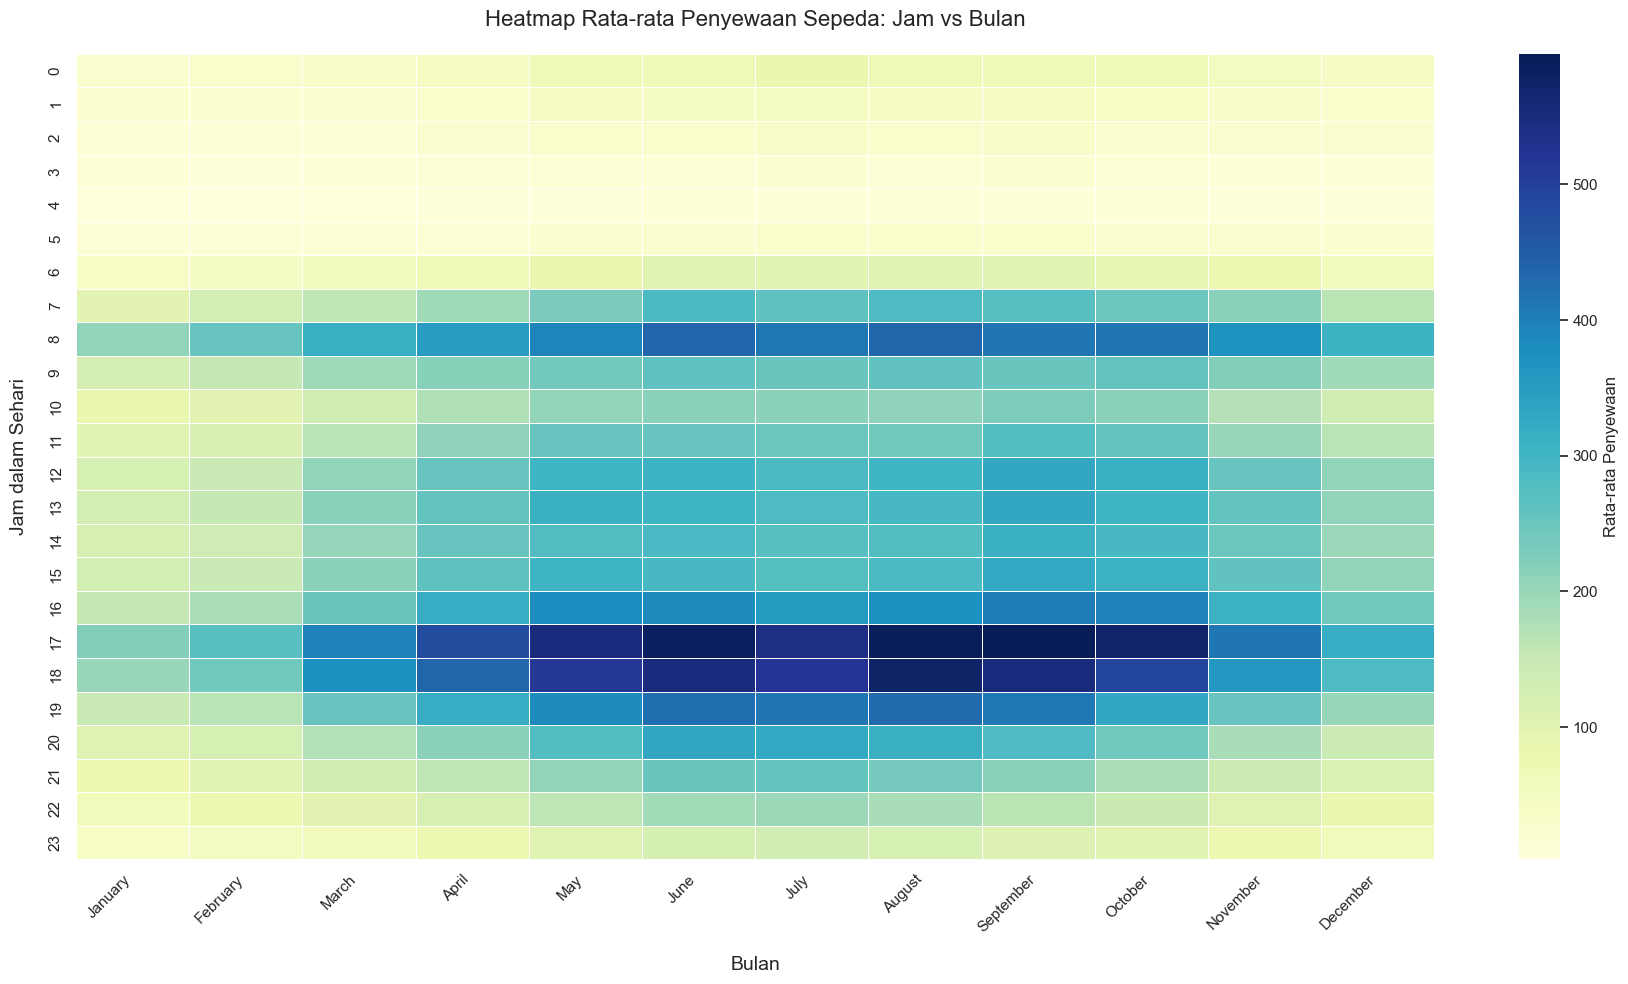

In [13]:
# Heatmap Jam vs Bulan
month_order = calendar.month_name[1:] # Januari hingga Desember
hour_month_heatmap_df = hour_data.pivot_table(index='hr', columns='month_name', values='cnt', aggfunc='mean')

if set(month_order).issubset(set(hour_month_heatmap_df.columns)):
    hour_month_heatmap_df = hour_month_heatmap_df.reindex(columns=month_order)
else:
    hour_month_heatmap_df = hour_month_heatmap_df.reindex(columns=[col for col in month_order if col in hour_month_heatmap_df.columns])

plt.figure(figsize=(18, 10))
sns.heatmap(hour_month_heatmap_df, cmap='YlGnBu', annot=False, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Rata-rata Penyewaan'})
plt.title('Heatmap Rata-rata Penyewaan Sepeda: Jam vs Bulan', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=14, labelpad=15)
plt.ylabel('Jam dalam Sehari', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight Heatmap Jam vs Bulan:**
- Puncak penggunaan pagi dan sore lebih intens (warna lebih terang) pada bulan-bulan hangat (misalnya, Mei hingga Oktober) dibandingkan bulan-bulan dingin (Desember hingga Februari).
- Pada bulan-bulan musim panas, aktivitas penyewaan di siang hari (di luar jam puncak komuter) mungkin juga menunjukkan peningkatan.
- Durasi "hari aktif" penyewaan (jam dengan penyewaan signifikan) mungkin lebih panjang pada bulan-bulan dengan siang hari lebih panjang.

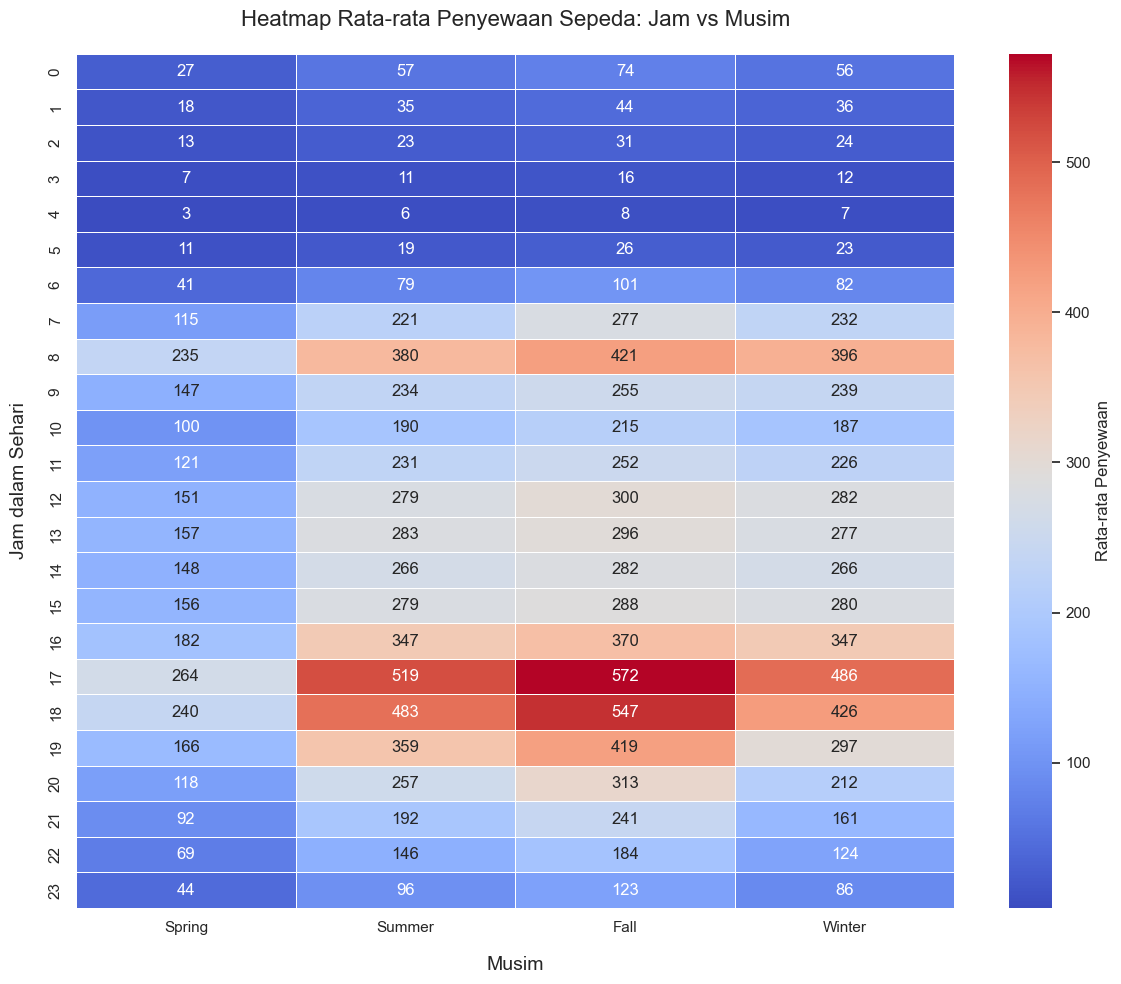

In [14]:
# Heatmap Jam vs Musim
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
hour_season_heatmap_df = hour_data.pivot_table(index='hr', columns='season_name', values='cnt', aggfunc='mean')

if set(season_order).issubset(set(hour_season_heatmap_df.columns)):
    hour_season_heatmap_df = hour_season_heatmap_df.reindex(columns=season_order)
else:
    hour_season_heatmap_df = hour_season_heatmap_df.reindex(columns=[col for col in season_order if col in hour_season_heatmap_df.columns])

plt.figure(figsize=(12, 10))
sns.heatmap(hour_season_heatmap_df, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Rata-rata Penyewaan'})
plt.title('Heatmap Rata-rata Penyewaan Sepeda: Jam vs Musim', fontsize=16, pad=20)
plt.xlabel('Musim', fontsize=14, labelpad=15)
plt.ylabel('Jam dalam Sehari', fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()

**Insight Heatmap Jam vs Musim:**
- Musim Gugur (Fall) dan Musim Panas (Summer) kemungkinan menunjukkan intensitas penyewaan tertinggi secara keseluruhan, terutama pada jam-jam puncak dan siang hari.
- Musim Semi (Spring) mungkin menunjukkan pola transisi, dengan intensitas yang lebih rendah dibandingkan summer/fall tetapi lebih tinggi dari winter.
- Musim Dingin (Winter) cenderung memiliki intensitas penyewaan yang paling rendah, dan puncak harian mungkin kurang tajam atau sedikit bergeser.

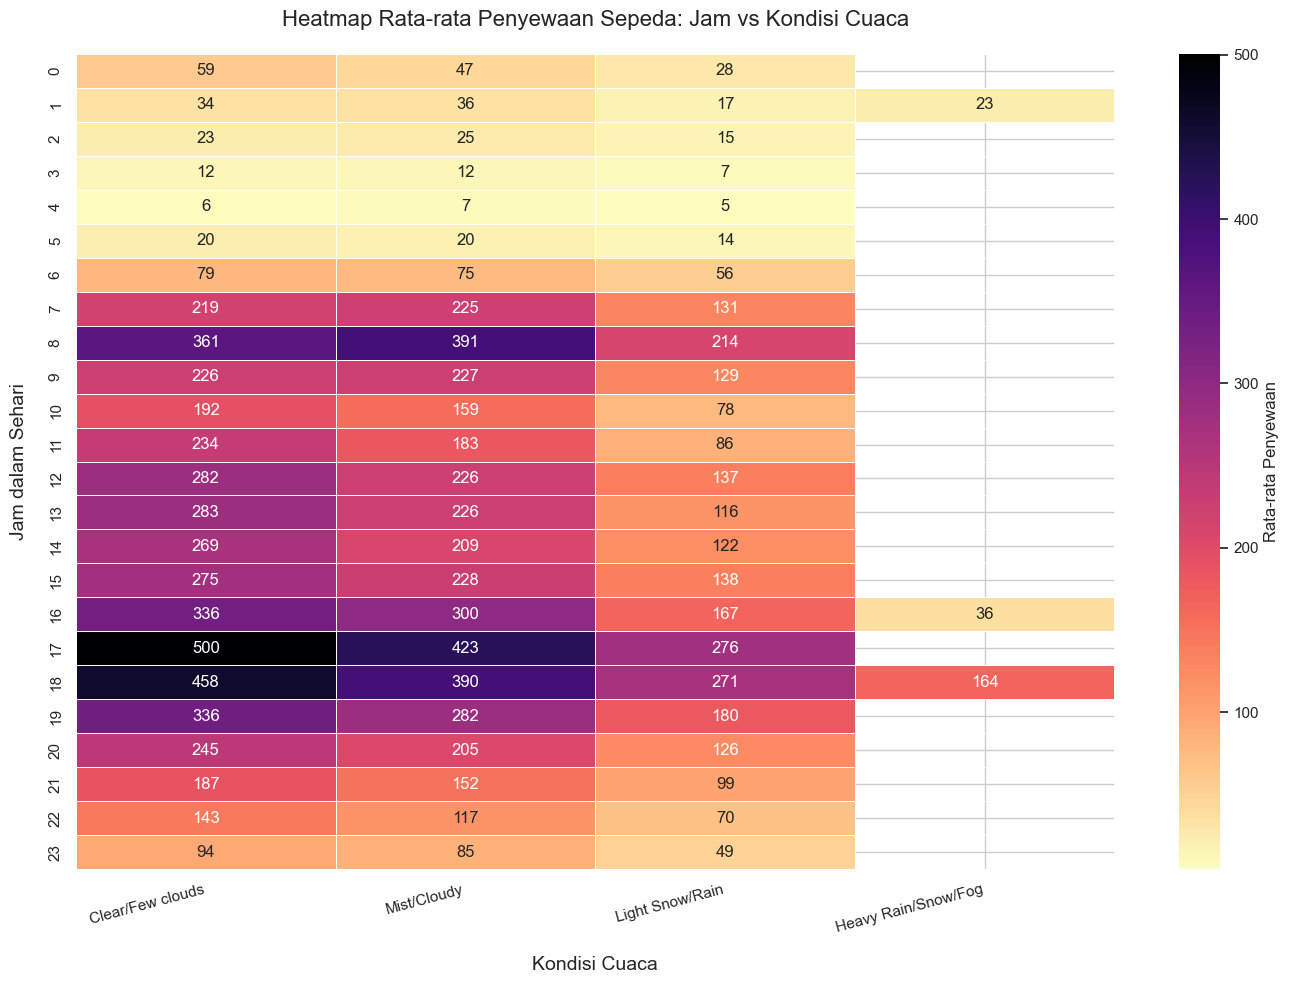

In [15]:
# Heatmap Jam vs Kondisi Cuaca
# Ini berdasarkan asumsi pemetaan: 1->Clear, 2->Mist, 3->Light, 4->Heavy
weather_condition_order = [
    'Clear/Few clouds',
    'Mist/Cloudy',
    'Light Snow/Rain',
    'Heavy Rain/Snow/Fog'
]
available_weather_conditions = [cond for cond in weather_condition_order if cond in hour_data['weather_condition'].unique()]

hour_weather_heatmap_df = hour_data.pivot_table(index='hr', columns='weather_condition', values='cnt', aggfunc='mean')

hour_weather_heatmap_df = hour_weather_heatmap_df.reindex(columns=available_weather_conditions)


plt.figure(figsize=(14, 10))
sns.heatmap(hour_weather_heatmap_df, cmap='magma_r', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Rata-rata Penyewaan'})
plt.title('Heatmap Rata-rata Penyewaan Sepeda: Jam vs Kondisi Cuaca', fontsize=16, pad=20)
plt.xlabel('Kondisi Cuaca', fontsize=14, labelpad=15)
plt.ylabel('Jam dalam Sehari', fontsize=14, labelpad=15)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

**Insight Heatmap Jam vs Kondisi Cuaca:**
- Pada kondisi cuaca "Clear/Few clouds", pola puncak pagi dan sore terlihat dengan intensitas tinggi.
- Pada kondisi "Mist/Cloudy", intensitas penyewaan sedikit menurun di semua jam dibandingkan cuaca cerah, namun pola umum harian mungkin tetap terjaga.
- Pada kondisi "Light Snow/Rain", terjadi penurunan signifikan pada intensitas penyewaan di semua jam, terutama di luar jam komuter utama.
- Pada kondisi "Heavy Rain/Snow/Fog", penyewaan sepeda hampir tidak ada atau sangat rendah di semua jam, menunjukkan dampak cuaca buruk yang sangat signifikan.

### Pertanyaan 2: Perbedaan Pengguna Casual dan Registered

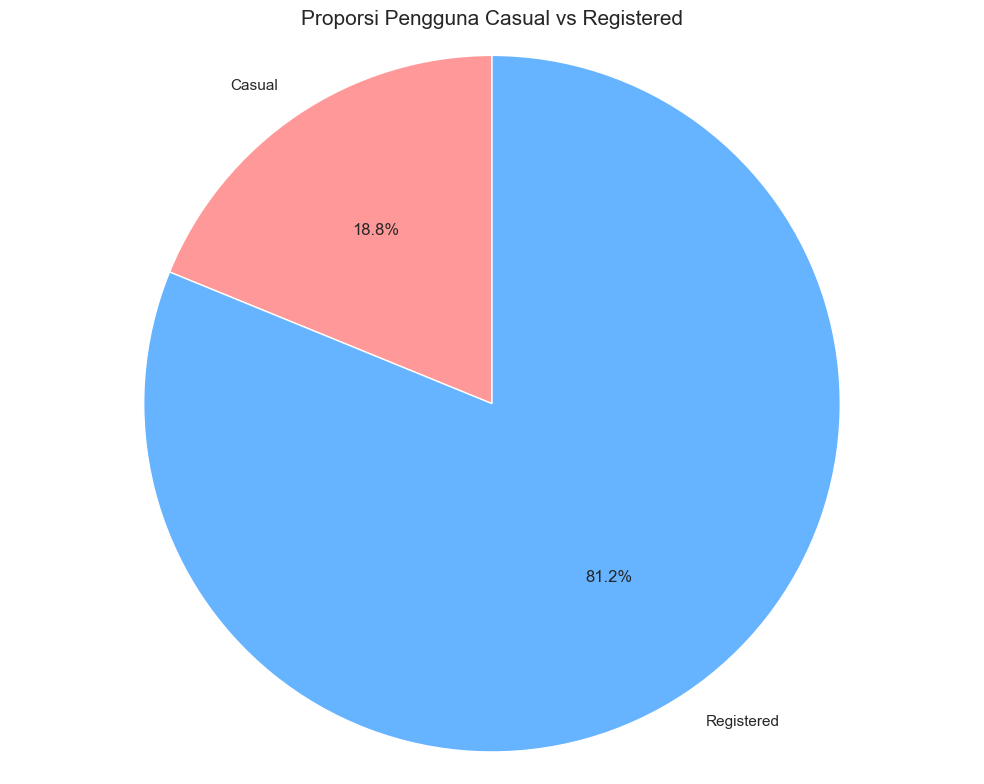

In [16]:
# Perbandingan pengguna casual vs registered
total_users = day_data[['casual', 'registered']].sum()
labels = ['Casual', 'Registered']

plt.figure(figsize=(10, 8))
plt.pie(total_users, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proporsi Pengguna Casual vs Registered', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight:**

1. **Dominasi Pengguna Registered**
   - Pengguna registered mendominasi dengan proporsi 81,2% dari total penyewaan sepeda
   - Hanya 18,8% penyewaan dilakukan oleh pengguna casual
   - Perbandingan ini menunjukkan rasio sekitar 4:1 antara pengguna registered dan casual

2. **Pangsa Pasar yang Tidak Seimbang**
   - Terdapat kesenjangan yang sangat besar antara kedua jenis pengguna
   - Pengguna registered menghasilkan lebih dari 4/5 dari total transaksi penyewaan

3. **Indikasi Loyalitas Pelanggan**
   - Tingginya persentase pengguna registered menunjukkan keberhasilan dalam membangun basis pelanggan tetap
   - Mengindikasikan bahwa mayoritas pengguna adalah pelanggan berulang yang memiliki komitmen jangka panjang

4. **Potensi Pertumbuhan dari Pengguna Casual**
   - Segmen pengguna casual (18,8%) mewakili peluang konversi untuk meningkatkan basis pengguna registered
   - Meskipun kecil, segmen ini penting sebagai pintu masuk pengguna baru ke dalam sistem

5. **Stabilitas Pendapatan**
   - Dominasi pengguna registered menunjukkan basis pendapatan yang lebih stabil dan dapat diprediksi
   - Layanan memiliki arus pendapatan yang lebih terjamin dari basis pelanggan tetap

## **Analisis Lanjutan**

### Clustering: Manual Grouping Pengguna Berdasarkan Waktu Penggunaan (Pagi, Siang, Sore, Malam)

Karakteristik Grup Pengguna Berdasarkan Waktu Penggunaan:
               avg_total_users  avg_casual_users  avg_registered_users  \
time_of_day                                                              
Pagi (05-10)        177.071264         19.327356            157.743908   
Siang (11-15)       241.475563         70.129599            171.345964   
Sore (16-20)        347.343304         58.845499            288.497805   
Malam (21-04)        65.687968         11.509316             54.178652   

                avg_temp  avg_humidity  dominant_weather  
time_of_day                                               
Pagi (05-10)   13.465926     69.962299  Clear/Few clouds  
Siang (11-15)  17.863163     52.173531  Clear/Few clouds  
Sore (16-20)   17.319896     54.378430  Clear/Few clouds  
Malam (21-04)  13.958812     69.224099  Clear/Few clouds  


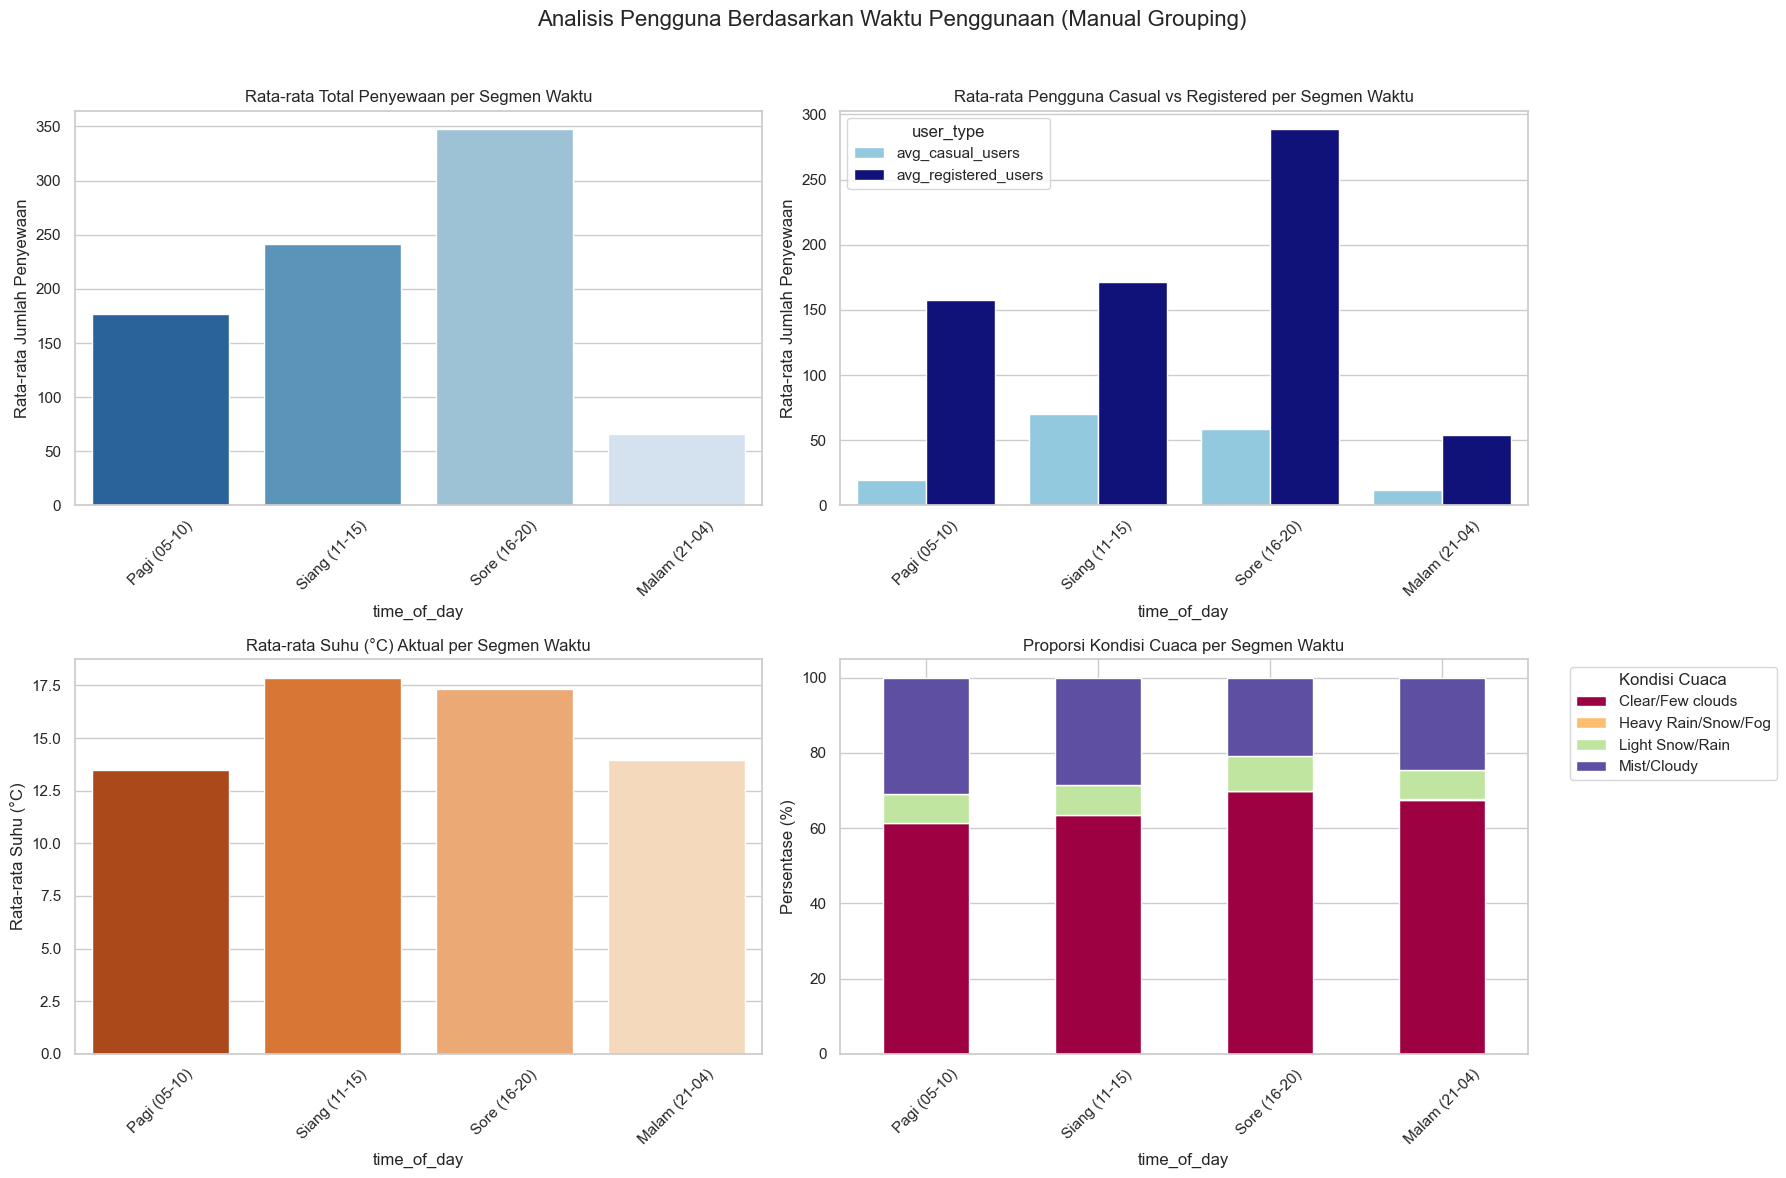

In [17]:
def assign_time_of_day(hr):
    if 5 <= hr <= 10: # Pagi diperluas sedikit untuk menangkap awal aktivitas
        return 'Pagi (05-10)'
    elif 11 <= hr <= 15: # Siang
        return 'Siang (11-15)'
    elif 16 <= hr <= 20: # Sore diperluas sedikit
        return 'Sore (16-20)'
    else: # Malam (21-04)
        return 'Malam (21-04)'

hour_data['time_of_day'] = hour_data['hr'].apply(assign_time_of_day)

# Analisis karakteristik masing-masing grup waktu
time_of_day_order = ['Pagi (05-10)', 'Siang (11-15)', 'Sore (16-20)', 'Malam (21-04)']
time_of_day_analysis = hour_data.groupby('time_of_day').agg(
    avg_total_users=('cnt', 'mean'),
    avg_casual_users=('casual', 'mean'),
    avg_registered_users=('registered', 'mean'),
    avg_temp=('temp_actual', 'mean'),
    avg_humidity=('hum_actual', 'mean'),
    dominant_weather=('weather_condition', lambda x: x.mode()[0])
).reindex(time_of_day_order)

print("Karakteristik Grup Pengguna Berdasarkan Waktu Penggunaan:")
print(time_of_day_analysis)

# Visualisasi untuk Manual Grouping
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Analisis Pengguna Berdasarkan Waktu Penggunaan (Manual Grouping)', fontsize=16)

# 1. Rata-rata Total Pengguna per Segmen Waktu
sns.barplot(x=time_of_day_analysis.index, y='avg_total_users', data=time_of_day_analysis, ax=axes[0,0], palette='Blues_r', order=time_of_day_order)
axes[0,0].set_title('Rata-rata Total Penyewaan per Segmen Waktu')
axes[0,0].set_ylabel('Rata-rata Jumlah Penyewaan')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Rata-rata Pengguna Casual vs Registered per Segmen Waktu
time_of_day_melted = time_of_day_analysis[['avg_casual_users', 'avg_registered_users']].reset_index().melt(id_vars='time_of_day', var_name='user_type', value_name='avg_users')
time_of_day_melted['time_of_day'] = pd.Categorical(time_of_day_melted['time_of_day'], categories=time_of_day_order, ordered=True)

sns.barplot(x='time_of_day', y='avg_users', hue='user_type', data=time_of_day_melted, ax=axes[0,1], palette={'avg_casual_users': 'skyblue', 'avg_registered_users': 'darkblue'})
axes[0,1].set_title('Rata-rata Pengguna Casual vs Registered per Segmen Waktu')
axes[0,1].set_ylabel('Rata-rata Jumlah Penyewaan')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Rata-rata Suhu per Segmen Waktu
sns.barplot(x=time_of_day_analysis.index, y='avg_temp', data=time_of_day_analysis, ax=axes[1,0], palette='Oranges_r', order=time_of_day_order)
axes[1,0].set_title('Rata-rata Suhu (°C) Aktual per Segmen Waktu')
axes[1,0].set_ylabel('Rata-rata Suhu (°C)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Dominant Weather Condition per Segmen Waktu (Lebih baik tabel atau teks)
# Untuk plot, kita bisa menunjukkan proporsi cuaca jika datanya mendukung
weather_counts_by_time = hour_data.groupby(['time_of_day', 'weather_condition']).size().unstack(fill_value=0)
weather_proportions_by_time = weather_counts_by_time.apply(lambda x: x / x.sum() * 100, axis=1).reindex(time_of_day_order)

weather_proportions_by_time.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Spectral')
axes[1,1].set_title('Proporsi Kondisi Cuaca per Segmen Waktu')
axes[1,1].set_ylabel('Persentase (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

**Insight dari Analisis Lanjutan:**
- Metode: Pengelompokan manual (Manual Grouping) berdasarkan jam penggunaan menjadi empat kategori: Pagi, Siang, Sore, dan Malam.
- Alasan: Untuk memahami bagaimana perilaku penyewaan (total, casual, registered) dan kondisi cuaca (suhu, kelembapan) berbeda di berbagai segmen waktu dalam sehari. Ini relevan karena pertanyaan bisnis pertama menyoroti pentingnya faktor waktu.

**Insight dari Manual Grouping Berdasarkan Waktu Penggunaan:**
- **Pagi (05-10):** Penggunaan didominasi oleh pengguna registered (komuter). Rata-rata suhu lebih rendah. Cuaca dominan cerah/sedikit berawan.
- **Siang (11-15):** Penggunaan casual meningkat proporsinya, meskipun registered tetap dominan. Rata-rata suhu tertinggi. Cuaca dominan cerah/sedikit berawan.
- **Sore (16-20):** Puncak penggunaan baik untuk casual maupun registered (terutama registered, kembali komuter). Suhu mulai menurun. Cuaca dominan cerah/sedikit berawan.
- **Malam (21-04):** Penggunaan terendah untuk kedua tipe pengguna. Suhu paling rendah. Meskipun dominan cerah, aktivitas penyewaan sangat berkurang.
- Pola cuaca relatif serupa antar segmen waktu (dominan cerah/sedikit berawan), menunjukkan bahwa perbedaan penggunaan antar segmen waktu lebih dipengaruhi oleh pola aktivitas harian (kerja, rekreasi) daripada variasi cuaca signifikan antar segmen waktu tersebut.

## **Conclusion**

### **Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Faktor Waktu (Jam, Hari, Bulan, Musim) dan Faktor Cuaca**

Pola penggunaan sepeda menunjukkan variasi yang signifikan berdasarkan faktor waktu dan kondisi cuaca:

1.  **Pola Berdasarkan Jam (Hourly Pattern):**
    * Terdapat pola **bimodal** yang jelas dalam penggunaan sepeda harian, terutama pada hari kerja.
    * **Puncak Pagi:** Terjadi sekitar pukul 08:00 pagi, dengan rata-rata penyewaan yang tinggi (sekitar 350-360 penyewaan), didominasi oleh pengguna *registered* yang kemungkinan besar adalah komuter.
    * **Puncak Sore:** Terjadi sekitar pukul 17:00-18:00 sore, dan ini merupakan puncak tertinggi dalam sehari (sekitar 450-470 penyewaan), juga didominasi oleh pengguna *registered*.
    * **Penggunaan Siang Hari (di luar puncak):** Relatif stabil antara pukul 10:00 hingga 15:00 (sekitar 175-260 penyewaan).
    * **Penggunaan Terendah:** Terjadi pada dini hari, sekitar pukul 03:00-04:00 pagi (kurang dari 10 penyewaan).
    * Heatmap jam vs. hari menunjukkan pola komuter ini sangat kuat pada hari Senin-Jumat, sedangkan pada Sabtu-Minggu aktivitas lebih tinggi dan merata pada siang hingga sore hari.

2.  **Pola Berdasarkan Hari dalam Seminggu (Daily Pattern):**
    * Rata-rata penyewaan cenderung lebih tinggi pada **hari kerja (Kamis dan Jumat tertinggi)** dibandingkan awal pekan (Senin).
    * **Akhir pekan (Sabtu dan Minggu)** juga menunjukkan tingkat penyewaan yang cukup tinggi, mengindikasikan penggunaan untuk tujuan rekreasi, dengan aktivitas yang lebih merata dari siang hingga sore.

3.  **Pola Berdasarkan Bulan dan Musim (Monthly & Seasonal Pattern):**
    * Penggunaan sepeda menunjukkan tren musiman yang jelas.
    * **Puncak Penggunaan:** Terjadi pada bulan-bulan hangat, yaitu dari **Juni hingga September (Musim Panas dan Gugur)**. Musim **Gugur (Fall)** mencatatkan rata-rata penyewaan tertinggi (sekitar 236 penyewaan/jam), diikuti Musim Panas (Summer, sekitar 208 penyewaan/jam).
    * **Penggunaan Terendah:** Terjadi pada bulan-bulan dingin, yaitu **Januari dan Februari (Musim Semi/Spring berdasarkan mapping dataset)**, di mana Musim Semi mencatatkan rata-rata terendah (sekitar 111 penyewaan/jam). Musim Dingin (Winter) masih lebih tinggi dari Musim Semi.
    * Heatmap jam vs. bulan dan jam vs. musim mengkonfirmasi bahwa puncak penggunaan pagi dan sore lebih intens pada bulan-bulan hangat/musim panas dan gugur.

4.  **Pengaruh Kondisi Cuaca (Weather Influence):**
    * Kondisi cuaca sangat memengaruhi jumlah penyewaan.
    * **Cuaca Ideal ("Clear/Few clouds"):** Menghasilkan rata-rata penyewaan tertinggi (sekitar 205 penyewaan/jam).
    * **Cuaca Berkabut/Berawan ("Mist/Cloudy"):** Masih menunjukkan tingkat penyewaan yang cukup tinggi (sekitar 175 penyewaan/jam).
    * **Cuaca Hujan Ringan/Salju Ringan ("Light Snow/Rain"):** Menyebabkan penurunan signifikan (sekitar 112 penyewaan/jam).
    * **Cuaca Buruk ("Heavy Rain/Snow/Fog"):** Memiliki dampak negatif paling besar, menurunkan penyewaan secara drastis (sekitar 74 penyewaan/jam, meskipun data untuk kategori ini terbatas).
    * Denormalisasi data suhu menunjukkan bahwa penggunaan sepeda lebih tinggi pada suhu yang nyaman (tidak terlalu dingin atau panas).

### **Pertanyaan 2: Apa Perbedaan Karakteristik Antara Pengguna Casual dan Registered, dan Bagaimana Ini Dapat Memengaruhi Strategi Bisnis?**

Terdapat perbedaan karakteristik dan perilaku yang jelas antara pengguna *casual* dan *registered*:

1.  **Dominasi Pengguna Registered:**
    * Pengguna **registered** mendominasi secara signifikan, mencakup **81,2%** dari total penyewaan sepeda. Ini menunjukkan adanya basis pelanggan loyal yang kuat dan menjadi tulang punggung operasional.
    * Pengguna **casual** hanya menyumbang **18,8%** dari total penyewaan.

2.  **Pola Penggunaan Berdasarkan Waktu:**
    * **Pengguna Registered:**
        * Menunjukkan pola penggunaan yang sangat kuat terkait **komuting** pada hari kerja, dengan puncak aktivitas pada pukul 08:00 pagi dan 17:00-18:00 sore.
        * Proporsi mereka paling tinggi pada jam-jam sibuk pagi dan sore di hari kerja.
    * **Pengguna Casual:**
        * Lebih aktif pada **akhir pekan dan hari libur**, dengan puncak penggunaan di siang hingga sore hari (sekitar pukul 11:00-16:00).
        * Pada hari kerja, penggunaan casual cenderung lebih tinggi pada jam-jam di luar puncak komuter, yaitu siang hari.
        * Analisis manual grouping berdasarkan segmen waktu (Pagi, Siang, Sore, Malam) mengkonfirmasi bahwa pengguna casual lebih banyak di segmen Siang dan Sore, sementara Registered sangat dominan di Pagi dan Sore (terutama jam komuter).

3.  **Pola Penggunaan Berdasarkan Musim dan Cuaca:**
    * **Pengguna Casual:** Menunjukkan proporsi penggunaan yang lebih tinggi selama musim-musim dengan cuaca hangat seperti **Musim Panas (Summer) dan Gugur (Fall)** dibandingkan pengguna *registered*.
    * Sensitivitas terhadap cuaca buruk tampak lebih tinggi pada pengguna *casual*.

4.  **Implikasi Strategis:**
    * **Pengguna Registered:** Merupakan target utama untuk program retensi dan peningkatan frekuensi penggunaan karena kontribusi mereka yang besar dan stabil.
    * **Pengguna Casual:** Mewakili potensi pertumbuhan yang signifikan. Strategi untuk mengkonversi pengguna *casual* menjadi *registered* dapat meningkatkan loyalitas dan pendapatan (misalnya, penawaran khusus untuk registrasi setelah beberapa kali sewa casual, atau paket akhir pekan untuk registrasi). Penargetan promosi untuk aktivitas rekreasi pada akhir pekan atau selama musim hangat bisa efektif untuk segmen ini.

**Kesimpulan Umum dari Analisis Lanjutan (Manual Grouping):**
Pengelompokan waktu penggunaan menjadi Pagi (05-10), Siang (11-15), Sore (16-20), dan Malam (21-04) memperjelas bahwa:
* Segmen **Pagi** dan **Sore** memiliki rata-rata total penyewaan tertinggi, dengan dominasi kuat pengguna *registered*. Rata-rata suhu di segmen ini moderat.
* Segmen **Siang** menunjukkan peningkatan kontribusi pengguna *casual* dan memiliki suhu rata-rata tertinggi.
* Segmen **Malam** memiliki aktivitas terendah untuk semua jenis pengguna dengan suhu rata-rata yang lebih rendah.
* Kondisi cuaca dominan ("Clear/Few clouds") relatif serupa di semua segmen waktu, menunjukkan bahwa pola aktivitas harian lebih berpengaruh pada variasi penggunaan antar segmen waktu dibandingkan variasi cuaca signifikan dalam sehari.

## **Rekomendasi Bisnis**

1.  **Optimalisasi Operasional & Penargetan Pengguna:**
    * **Jam Sibuk Komuter (Registered Users):**
        * Pastikan ketersediaan sepeda yang cukup di area perkantoran/bisnis dan stasiun transportasi publik pada jam 07:00-09:00 dan 16:00-19:00 pada hari kerja (Senin-Jumat).
        * Tawarkan "Paket Komuter Mingguan/Bulanan" untuk pengguna *registered* dengan tarif diskon atau bonus poin loyalitas untuk penggunaan rutin di jam sibuk.
    * **Akhir Pekan & Hari Libur (Casual Users):**
        * Tingkatkan ketersediaan sepeda di area rekreasi, taman, dan pusat wisata pada hari Sabtu dan Minggu, terutama pukul 11:00-16:00.
        * Buat promosi "Weekend Pass" atau "Family Day Out Package" untuk menarik lebih banyak pengguna *casual*.
        * Pertimbangkan untuk menawarkan sepeda jenis tandem atau dengan keranjang tambahan di lokasi wisata untuk pengguna *casual*.
    * **Penggunaan Siang Hari (Hari Kerja):**
        * Untuk meningkatkan utilisasi di luar jam puncak (10:00-15:00) pada hari kerja, tawarkan "Diskon Makan Siang" atau "Happy Hour Ride" dengan tarif lebih rendah.

2.  **Program Loyalitas & Konversi Pengguna:**
    * **Konversi Casual ke Registered:**
        * Berikan insentif bagi pengguna *casual* untuk beralih ke *registered*, misalnya diskon pada registrasi pertama setelah beberapa kali penyewaan, atau akumulasi poin dari sewa *casual* yang bisa ditukarkan saat registrasi.
    * **Pengembangan Program Loyalitas Registered:**
        * Perkuat program loyalitas untuk pengguna *registered* dengan tingkatan keanggotaan (misalnya Silver, Gold, Platinum) berdasarkan frekuensi penggunaan, yang memberikan benefit tambahan seperti gratis sewa beberapa jam, prioritas ketersediaan, atau akses ke event eksklusif.

3.  **Inisiatif Musiman & Berbasis Cuaca:**
    * **Promosi Musim Ramai (Gugur & Panas):**
        * Maksimalkan promosi selama musim gugur dan panas (Juni-September) saat penggunaan sepeda sedang tinggi.
        * Adakan event bersepeda tematik seperti "Summer Night Ride" atau "Autumn Color Tour".
    * **Strategi Musim Sepi (Semi & Dingin Awal):**
        * Tawarkan diskon khusus atau promosi "Warm Ride" (misalnya, gratis minuman hangat di kafe mitra) untuk mendorong penggunaan di musim semi atau awal musim dingin (Januari-Februari).
    * **Mitigasi Risiko Cuaca:**
        * Integrasikan prediksi cuaca *real-time* dalam aplikasi penyewaan.
        * Tawarkan "Rain Guarantee" berupa diskon untuk penyewaan berikutnya jika durasi sewa terpotong oleh hujan lebat, atau sediakan sepeda "rain-ready" (dengan fender/pelindung hujan) di beberapa titik strategis.

4.  **Strategi Penempatan & Alokasi Armada:**
    * Gunakan data heatmap jam vs. hari, jam vs. bulan, dan jam vs. musim untuk optimasi penempatan armada sepeda. Pastikan konsentrasi sepeda lebih tinggi di area-area yang menunjukkan permintaan puncak pada waktu-waktu spesifik tersebut.
    * Analisis lebih lanjut proporsi pengguna *casual* vs *registered* per stasiun/lokasi dapat membantu penyesuaian jenis promosi yang lebih efektif di area tertentu.